In [1]:
# Load libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10) # Adjusts the configuration of the plots we will create

pd.set_option("display.max_columns", None)

In [2]:
# Load dataset

df = pd.read_csv('CustomerClaimAnalysis.csv')

In [3]:
df.head()

LoyaltyID Policy ID Automobile Lifetime Value  Coverage Expiry Date  \
0     493621   YA17061                     3,716  Extended  21/01/2019   
1     534716   HA45220                     5,258     Basic  29/01/2019   
2     852573   NI27358                     7,255     Basic  28/01/2019   
3     110089   GY99465                     6,869     Basic  27/01/2019   
4     686477   NQ92014                     3,659     Basic  10/01/2019   

  Employment Status  Income Claim Location Type  Monthly Premium Auto  \
0     Medical Leave  17,162            Suburban                    96   
1          Employed  37,874               Rural                    65   
2          Employed  67,352               Urban                   181   
3        Unemployed       0            Suburban                    69   
4        Unemployed       0            Suburban                   106   

   Months Since Last Claim  Months Since Policy Inception  \
0                       15                             29   
1                       30                             65   
2                        7                             90   
3                       18                             71   
4                       34                             39   

   Number of Open Complaints  Number of Policies     Policy Type  \
0                          0                   1  Corporate Auto   
1                          0                   8  Corporate Auto   
2                          1                   1   Personal Auto   
3                          2                   2  Corporate Auto   
4                          0                   1   Personal Auto   

   Policy Level Renew Offer Type Sales Channel Total Claim Amount  \
0  Corporate L2          Offer 2           Web              460.8   
1  Corporate L3          Offer 1        Branch              41.02   
2   Personal L3          Offer 3        Branch             560.95   
3  Corporate L2          Offer 2        Branch              331.2   
4   Personal L2          Offer 2           Web              763.2   

   Vehicle Class Vehicle Size Premiums Over Claim  Expiry Month Number  \
0  Four-Door Car        Small          6.04166667                    1   
1  Four-Door Car        Large         102.9985373                    1   
2     Luxury Car        Small         29.04002139                    1   
3  Four-Door Car       Medium         14.79166667                    1   
4            SUV       Medium          5.41666667                    1   

  Expiry Month  Policy Count  
0          Jan             1  
1          Jan             1  
2          Jan             1  
3          Jan             1  
4          Jan             1

In [4]:
# Check for null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

LoyaltyID - 0.0%
Policy ID - 0.0%
Automobile Lifetime Value - 0.0%
Coverage - 0.0%
Expiry Date - 0.0%
Employment Status - 0.0%
Income - 0.0%
Claim Location Type - 0.0%
Monthly Premium Auto - 0.0%
Months Since Last Claim - 0.0%
Months Since Policy Inception - 0.0%
Number of Open Complaints - 0.0%
Number of Policies - 0.0%
Policy Type - 0.0%
Policy Level - 0.0%
Renew Offer Type - 0.0%
Sales Channel - 0.0%
Total Claim Amount - 0.0%
Vehicle Class - 0.0%
Vehicle Size - 0.0%
Premiums Over Claim - 0.0%
Expiry Month Number - 0.0%
Expiry Month - 0.0%
Policy Count - 0.0%


In [5]:
df.nunique()

LoyaltyID                        9086
Policy ID                        9134
Automobile Lifetime Value        5669
Coverage                            3
Expiry Date                       364
Employment Status                   5
Income                           5694
Claim Location Type                 3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     110
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy Level                        9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               4946
Vehicle Class                       6
Vehicle Size                        3
Premiums Over Claim              4984
Expiry Month Number                12
Expiry Month                       12
Policy Count                        1
dtype: int64

In [6]:
df.describe()

LoyaltyID  Monthly Premium Auto  Months Since Last Claim  \
count    9134.000000           9134.000000              9134.000000   
mean   548669.806766             93.219291                15.097000   
std    260304.058027             34.407967                10.073257   
min    100209.000000             61.000000                 0.000000   
25%    323110.250000             68.000000                 6.000000   
50%    545792.000000             83.000000                14.000000   
75%    775846.250000            109.000000                23.000000   
max    999895.000000            298.000000                35.000000   

       Months Since Policy Inception  Number of Open Complaints  \
count                    9134.000000                9134.000000   
mean                       48.470769                   0.384388   
std                        28.026230                   0.910384   
min                         0.000000                   0.000000   
25%                        25.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        72.000000                   0.000000   
max                       109.000000                   5.000000   

       Number of Policies  Expiry Month Number  Policy Count  
count         9134.000000          9134.000000        9134.0  
mean             2.966170             6.480512           1.0  
std              2.390182             3.456508           0.0  
min              1.000000             1.000000           1.0  
25%              1.000000             3.000000           1.0  
50%              2.000000             6.000000           1.0  
75%              4.000000            10.000000           1.0  
max              9.000000            12.000000           1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   LoyaltyID                      9134 non-null   int64 
 1   Policy ID                      9134 non-null   object
 2   Automobile Lifetime Value      9134 non-null   object
 3   Coverage                       9134 non-null   object
 4   Expiry Date                    9134 non-null   object
 5   Employment Status              9134 non-null   object
 6   Income                         9134 non-null   object
 7   Claim Location Type            9134 non-null   object
 8   Monthly Premium Auto           9134 non-null   int64 
 9   Months Since Last Claim        9134 non-null   int64 
 10  Months Since Policy Inception  9134 non-null   int64 
 11  Number of Open Complaints      9134 non-null   int64 
 12  Number of Policies             9134 non-null   int64 
 13  Pol

In [8]:
# Convert column types from objects to strings first and then to required the datatype.

df['Income'] = df['Income'].astype('string')
df['Income'] = df['Income'].str.replace(',', '').astype('int64')

df['Automobile Lifetime Value'] = df['Automobile Lifetime Value'].astype('string')
df['Automobile Lifetime Value'] = df['Automobile Lifetime Value'].str.replace(',', '').astype('int64')

df['Total Claim Amount'] = df['Total Claim Amount'].astype('string')
df['Total Claim Amount'] = df['Total Claim Amount'].str.replace(',', '').astype('float64')

df['Premiums Over Claim'] = df['Premiums Over Claim'].astype('string')
df['Premiums Over Claim'] = df['Premiums Over Claim'].str.replace(',', '').astype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LoyaltyID                      9134 non-null   int64  
 1   Policy ID                      9134 non-null   object 
 2   Automobile Lifetime Value      9134 non-null   int64  
 3   Coverage                       9134 non-null   object 
 4   Expiry Date                    9134 non-null   object 
 5   Employment Status              9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Claim Location Type            9134 non-null   object 
 8   Monthly Premium Auto           9134 non-null   int64  
 9   Months Since Last Claim        9134 non-null   int64  
 10  Months Since Policy Inception  9134 non-null   int64  
 11  Number of Open Complaints      9134 non-null   int64  
 12  Number of Policies             9134 non-null   i

In [10]:
df.describe()

LoyaltyID  Automobile Lifetime Value        Income  \
count    9134.000000                9134.000000   9134.000000   
mean   548669.806766                8004.952157  37657.380009   
std    260304.058027                6870.969019  30379.904734   
min    100209.000000                1898.000000      0.000000   
25%    323110.250000                3994.250000      0.000000   
50%    545792.000000                5780.000000  33889.500000   
75%    775846.250000                8962.250000  62320.000000   
max    999895.000000               83325.000000  99981.000000   

       Monthly Premium Auto  Months Since Last Claim  \
count           9134.000000              9134.000000   
mean              93.219291                15.097000   
std               34.407967                10.073257   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       Months Since Policy Inception  Number of Open Complaints  \
count                    9134.000000                9134.000000   
mean                       48.470769                   0.384388   
std                        28.026230                   0.910384   
min                         0.000000                   0.000000   
25%                        25.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        72.000000                   0.000000   
max                       109.000000                   5.000000   

       Number of Policies  Total Claim Amount  Premiums Over Claim  \
count         9134.000000         9134.000000          9134.000000   
mean             2.966170          434.088834            38.040127   
std              2.390182          290.500043           676.061064   
min              1.000000            0.100000             0.000000   
25%              1.000000          272.260000             5.277778   
50%              2.000000          383.945000            10.625000   
75%              4.000000          547.515000            17.708333   
max              9.000000         2893.240000         59520.000000   

       Expiry Month Number  Policy Count  
count          9134.000000        9134.0  
mean              6.480512           1.0  
std               3.456508           0.0  
min               1.000000           1.0  
25%               3.000000           1.0  
50%               6.000000           1.0  
75%              10.000000           1.0  
max              12.000000           1.0

In [11]:
# Remove columns not required for analysis

df.drop(['LoyaltyID', 'Policy ID', 'Policy Count'], axis = 1, inplace = True)

df.head()

Automobile Lifetime Value  Coverage Expiry Date Employment Status  Income  \
0                       3716  Extended  21/01/2019     Medical Leave   17162   
1                       5258     Basic  29/01/2019          Employed   37874   
2                       7255     Basic  28/01/2019          Employed   67352   
3                       6869     Basic  27/01/2019        Unemployed       0   
4                       3659     Basic  10/01/2019        Unemployed       0   

  Claim Location Type  Monthly Premium Auto  Months Since Last Claim  \
0            Suburban                    96                       15   
1               Rural                    65                       30   
2               Urban                   181                        7   
3            Suburban                    69                       18   
4            Suburban                   106                       34   

   Months Since Policy Inception  Number of Open Complaints  \
0                             29                          0   
1                             65                          0   
2                             90                          1   
3                             71                          2   
4                             39                          0   

   Number of Policies     Policy Type  Policy Level Renew Offer Type  \
0                   1  Corporate Auto  Corporate L2          Offer 2   
1                   8  Corporate Auto  Corporate L3          Offer 1   
2                   1   Personal Auto   Personal L3          Offer 3   
3                   2  Corporate Auto  Corporate L2          Offer 2   
4                   1   Personal Auto   Personal L2          Offer 2   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
0           Web              460.80  Four-Door Car        Small   
1        Branch               41.02  Four-Door Car        Large   
2        Branch              560.95     Luxury Car        Small   
3        Branch              331.20  Four-Door Car       Medium   
4           Web              763.20            SUV       Medium   

   Premiums Over Claim  Expiry Month Number Expiry Month  
0             6.041667                    1          Jan  
1           102.998537                    1          Jan  
2            29.040021                    1          Jan  
3            14.791667                    1          Jan  
4             5.416667                    1          Jan

In [12]:
# Numerical columns

df_num = df[['Automobile Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
             'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
             'Premiums Over Claim']]

df_num.head()

# Categorical columns

df_cat = df[['Coverage', 'Employment Status', 'Claim Location Type', 'Policy Type', 'Policy Level', 'Renew Offer Type',
             'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Expiry Month']]

df_cat.head()

Coverage Employment Status Claim Location Type     Policy Type  \
0  Extended     Medical Leave            Suburban  Corporate Auto   
1     Basic          Employed               Rural  Corporate Auto   
2     Basic          Employed               Urban   Personal Auto   
3     Basic        Unemployed            Suburban  Corporate Auto   
4     Basic        Unemployed            Suburban   Personal Auto   

   Policy Level Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  \
0  Corporate L2          Offer 2           Web  Four-Door Car        Small   
1  Corporate L3          Offer 1        Branch  Four-Door Car        Large   
2   Personal L3          Offer 3        Branch     Luxury Car        Small   
3  Corporate L2          Offer 2        Branch  Four-Door Car       Medium   
4   Personal L2          Offer 2           Web            SUV       Medium   

  Expiry Month  
0          Jan  
1          Jan  
2          Jan  
3          Jan  
4          Jan

In [13]:
df.describe()

Automobile Lifetime Value        Income  Monthly Premium Auto  \
count                9134.000000   9134.000000           9134.000000   
mean                 8004.952157  37657.380009             93.219291   
std                  6870.969019  30379.904734             34.407967   
min                  1898.000000      0.000000             61.000000   
25%                  3994.250000      0.000000             68.000000   
50%                  5780.000000  33889.500000             83.000000   
75%                  8962.250000  62320.000000            109.000000   
max                 83325.000000  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.470769   
std                  10.073257                      28.026230   
min                   0.000000                       0.000000   
25%                   6.000000                      25.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      72.000000   
max                  35.000000                     109.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  \
count                9134.000000         9134.000000         9134.000000   
mean                    0.384388            2.966170          434.088834   
std                     0.910384            2.390182          290.500043   
min                     0.000000            1.000000            0.100000   
25%                     0.000000            1.000000          272.260000   
50%                     0.000000            2.000000          383.945000   
75%                     0.000000            4.000000          547.515000   
max                     5.000000            9.000000         2893.240000   

       Premiums Over Claim  Expiry Month Number  
count          9134.000000          9134.000000  
mean             38.040127             6.480512  
std             676.061064             3.456508  
min               0.000000             1.000000  
25%               5.277778             3.000000  
50%              10.625000             6.000000  
75%              17.708333            10.000000  
max           59520.000000            12.000000

<AxesSubplot:>

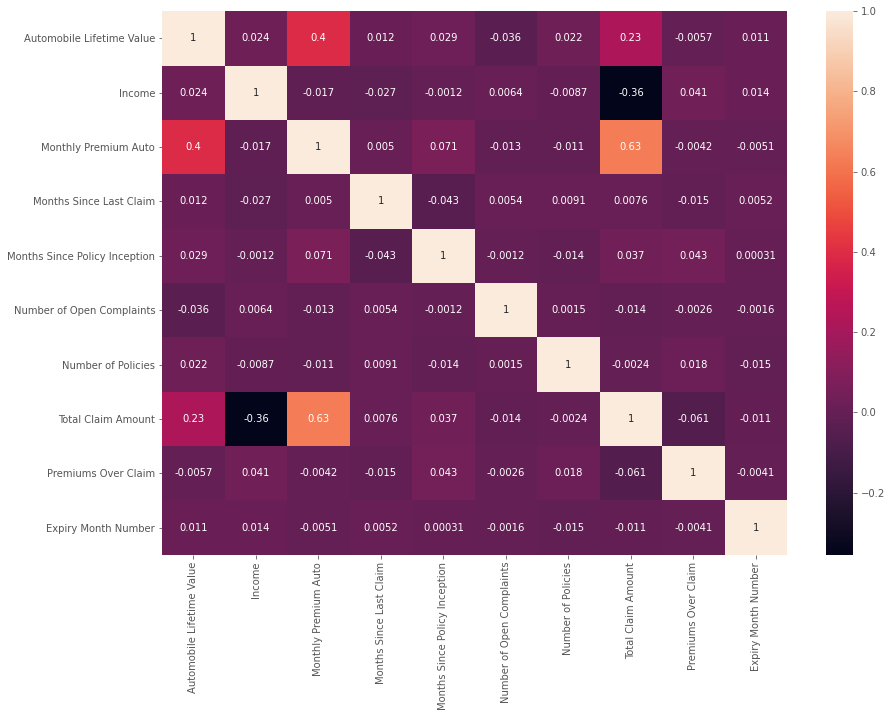

In [14]:
# Correlation matrix for numerical data

sns.heatmap(df.corr(), annot = True)

In [15]:
df.head()

Automobile Lifetime Value  Coverage Expiry Date Employment Status  Income  \
0                       3716  Extended  21/01/2019     Medical Leave   17162   
1                       5258     Basic  29/01/2019          Employed   37874   
2                       7255     Basic  28/01/2019          Employed   67352   
3                       6869     Basic  27/01/2019        Unemployed       0   
4                       3659     Basic  10/01/2019        Unemployed       0   

  Claim Location Type  Monthly Premium Auto  Months Since Last Claim  \
0            Suburban                    96                       15   
1               Rural                    65                       30   
2               Urban                   181                        7   
3            Suburban                    69                       18   
4            Suburban                   106                       34   

   Months Since Policy Inception  Number of Open Complaints  \
0                             29                          0   
1                             65                          0   
2                             90                          1   
3                             71                          2   
4                             39                          0   

   Number of Policies     Policy Type  Policy Level Renew Offer Type  \
0                   1  Corporate Auto  Corporate L2          Offer 2   
1                   8  Corporate Auto  Corporate L3          Offer 1   
2                   1   Personal Auto   Personal L3          Offer 3   
3                   2  Corporate Auto  Corporate L2          Offer 2   
4                   1   Personal Auto   Personal L2          Offer 2   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
0           Web              460.80  Four-Door Car        Small   
1        Branch               41.02  Four-Door Car        Large   
2        Branch              560.95     Luxury Car        Small   
3        Branch              331.20  Four-Door Car       Medium   
4           Web              763.20            SUV       Medium   

   Premiums Over Claim  Expiry Month Number Expiry Month  
0             6.041667                    1          Jan  
1           102.998537                    1          Jan  
2            29.040021                    1          Jan  
3            14.791667                    1          Jan  
4             5.416667                    1          Jan

In [16]:
# Convert object datatypes to category

for col in df.columns:
    if (df[col].dtype == 'object'):
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

In [17]:
df.head()

Automobile Lifetime Value  Coverage  Expiry Date  Employment Status  \
0                       3716         1          239                  2   
1                       5258         0          335                  0   
2                       7255         0          323                  0   
3                       6869         0          311                  4   
4                       3659         0          108                  4   

   Income  Claim Location Type  Monthly Premium Auto  Months Since Last Claim  \
0   17162                    1                    96                       15   
1   37874                    0                    65                       30   
2   67352                    2                   181                        7   
3       0                    1                    69                       18   
4       0                    1                   106                       34   

   Months Since Policy Inception  Number of Open Complaints  \
0                             29                          0   
1                             65                          0   
2                             90                          1   
3                             71                          2   
4                             39                          0   

   Number of Policies  Policy Type  Policy Level  Renew Offer Type  \
0                   1            0             1                 1   
1                   8            0             2                 0   
2                   1            1             5                 2   
3                   2            0             1                 1   
4                   1            1             4                 1   

   Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size  \
0              3              460.80              0             2   
1              1               41.02              0             0   
2              1              560.95              1             2   
3              1              331.20              0             1   
4              3              763.20              3             1   

   Premiums Over Claim  Expiry Month Number  Expiry Month  
0             6.041667                    1             4  
1           102.998537                    1             4  
2            29.040021                    1             4  
3            14.791667                    1             4  
4             5.416667                    1             4

<AxesSubplot:>

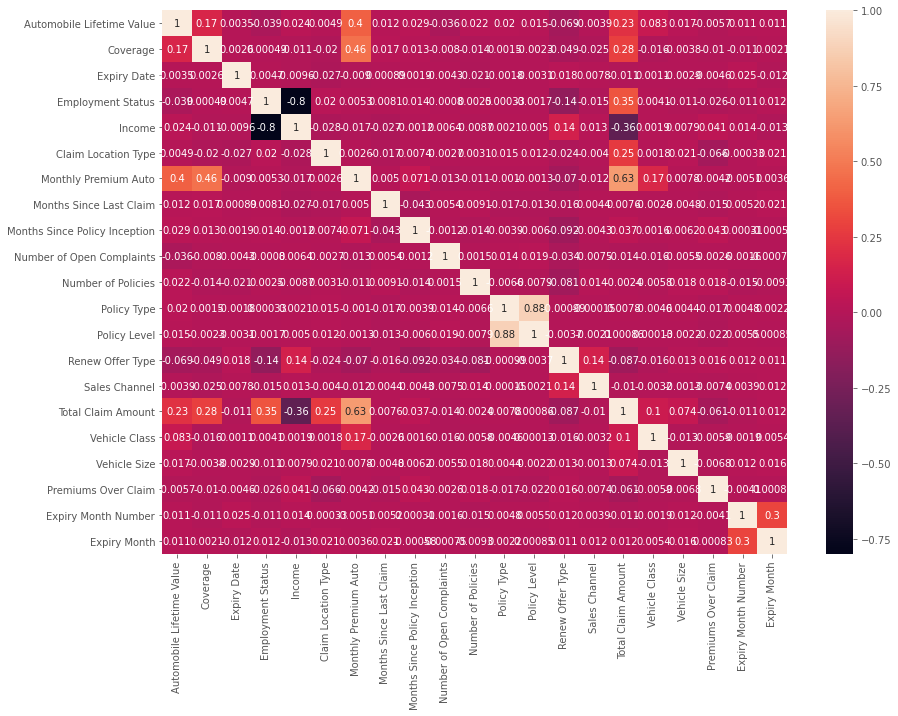

In [18]:
# Correlation matrix with all columns

sns.heatmap(df.corr(), annot = True)

In [19]:
df.mean()

Automobile Lifetime Value         8004.952157
Coverage                             0.480622
Expiry Date                        181.287169
Employment Status                    1.246223
Income                           37657.380009
Claim Location Type                  0.979089
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.470769
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Policy Type                          0.825925
Policy Level                         3.797788
Renew Offer Type                     0.970221
Sales Channel                        1.102693
Total Claim Amount                 434.088834
Vehicle Class                        1.901358
Vehicle Size                         1.089556
Premiums Over Claim                 38.040127
Expiry Month Number                  6.480512
Expiry Month                         5.480622
dtype: float64

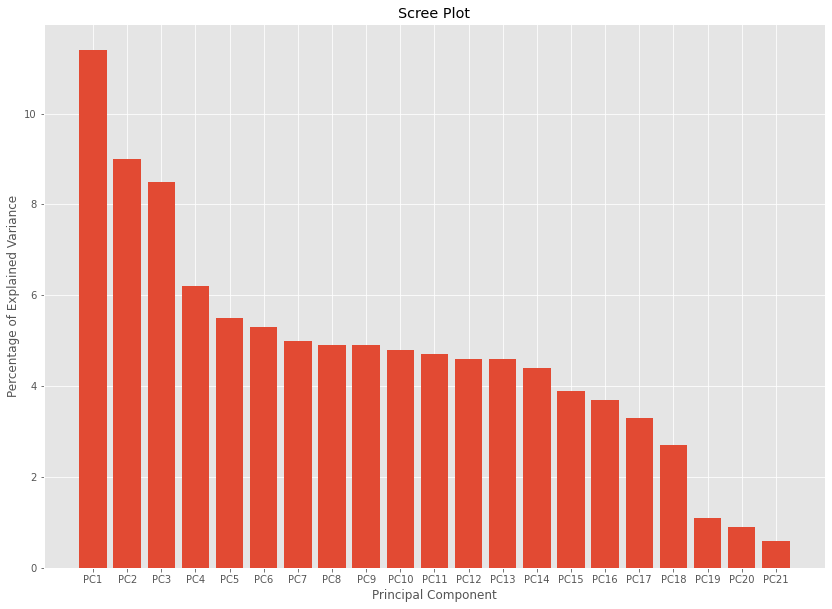

In [20]:
# Principal Component Analysis

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X = pd.DataFrame(scale(df), index = df.index, columns = df.columns)

pca = PCA()
pca.fit(X)
pca_data = pca.fit_transform(X)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

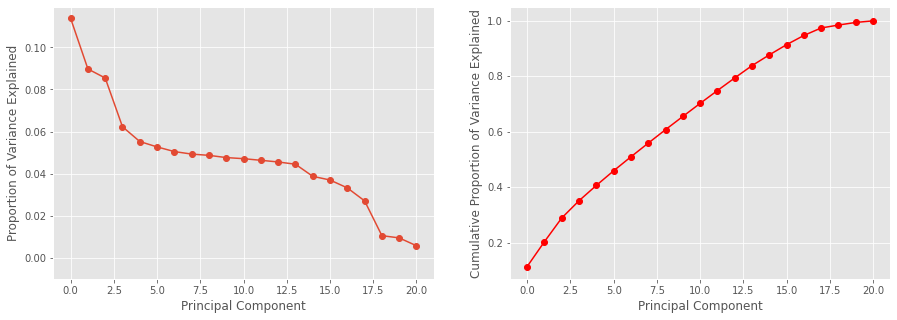

In [21]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# PVE plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# CPV plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,21)

Text(0, 0.5, 'PC2 - 9.0%')

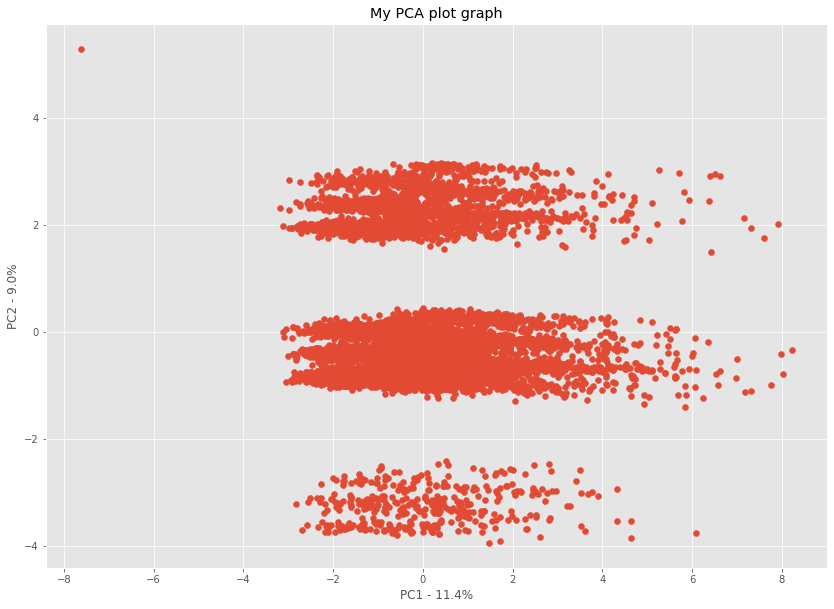

In [22]:
pca_df = pd.DataFrame(pca_data, columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA plot graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

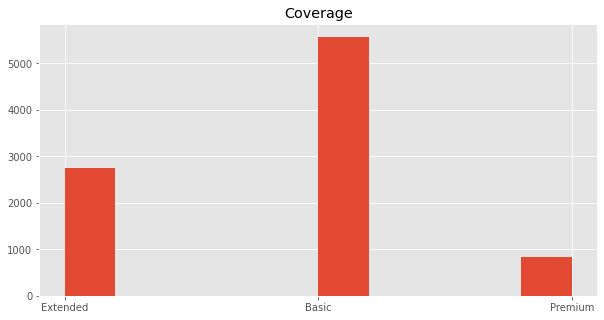

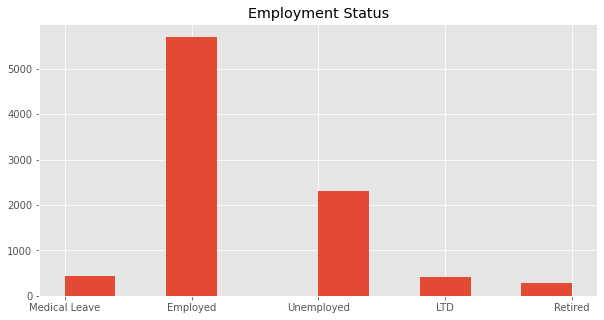

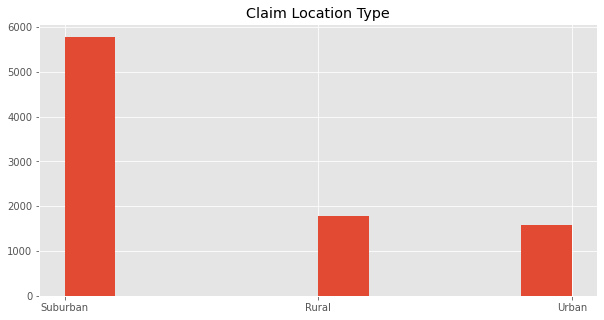

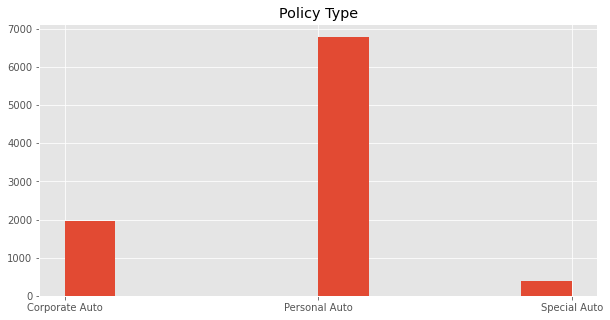

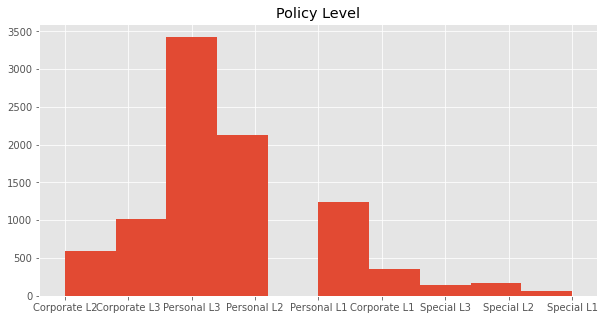

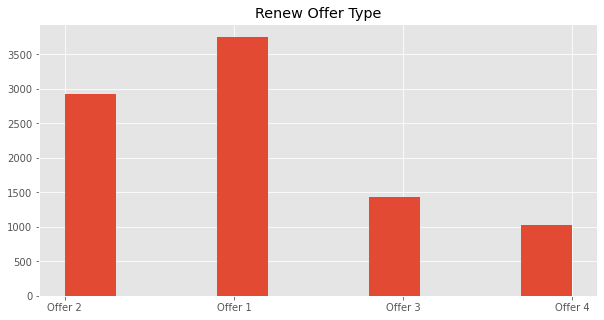

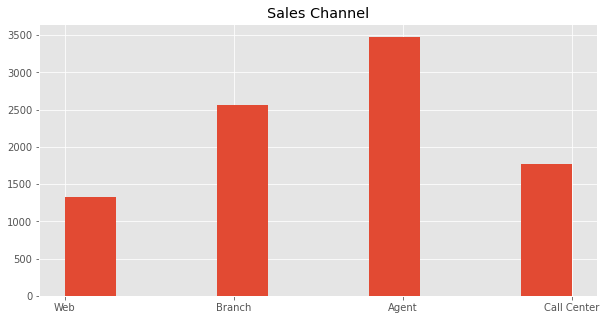

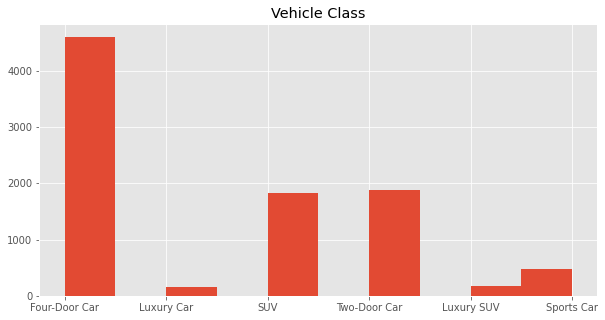

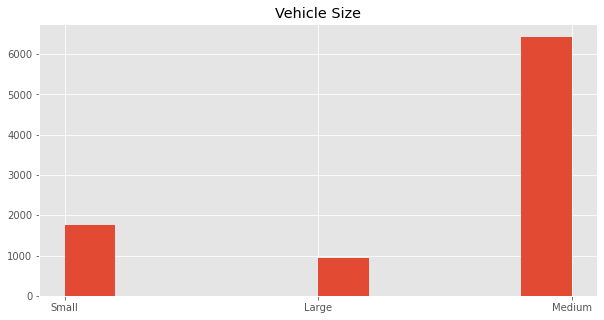

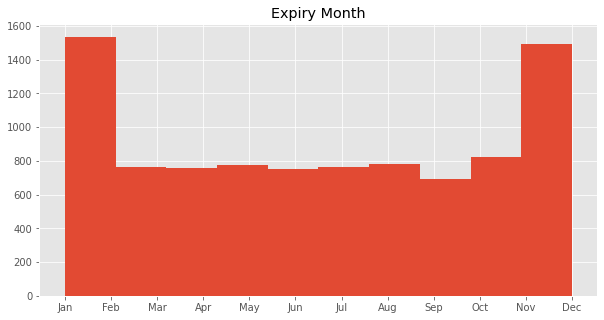

In [23]:
# Data visualization for further analysis

matplotlib.rcParams['figure.figsize'] = (10,5)

for col in df_cat.columns:
    plt.hist(df_cat[col])
    plt.title(col)
    plt.show()

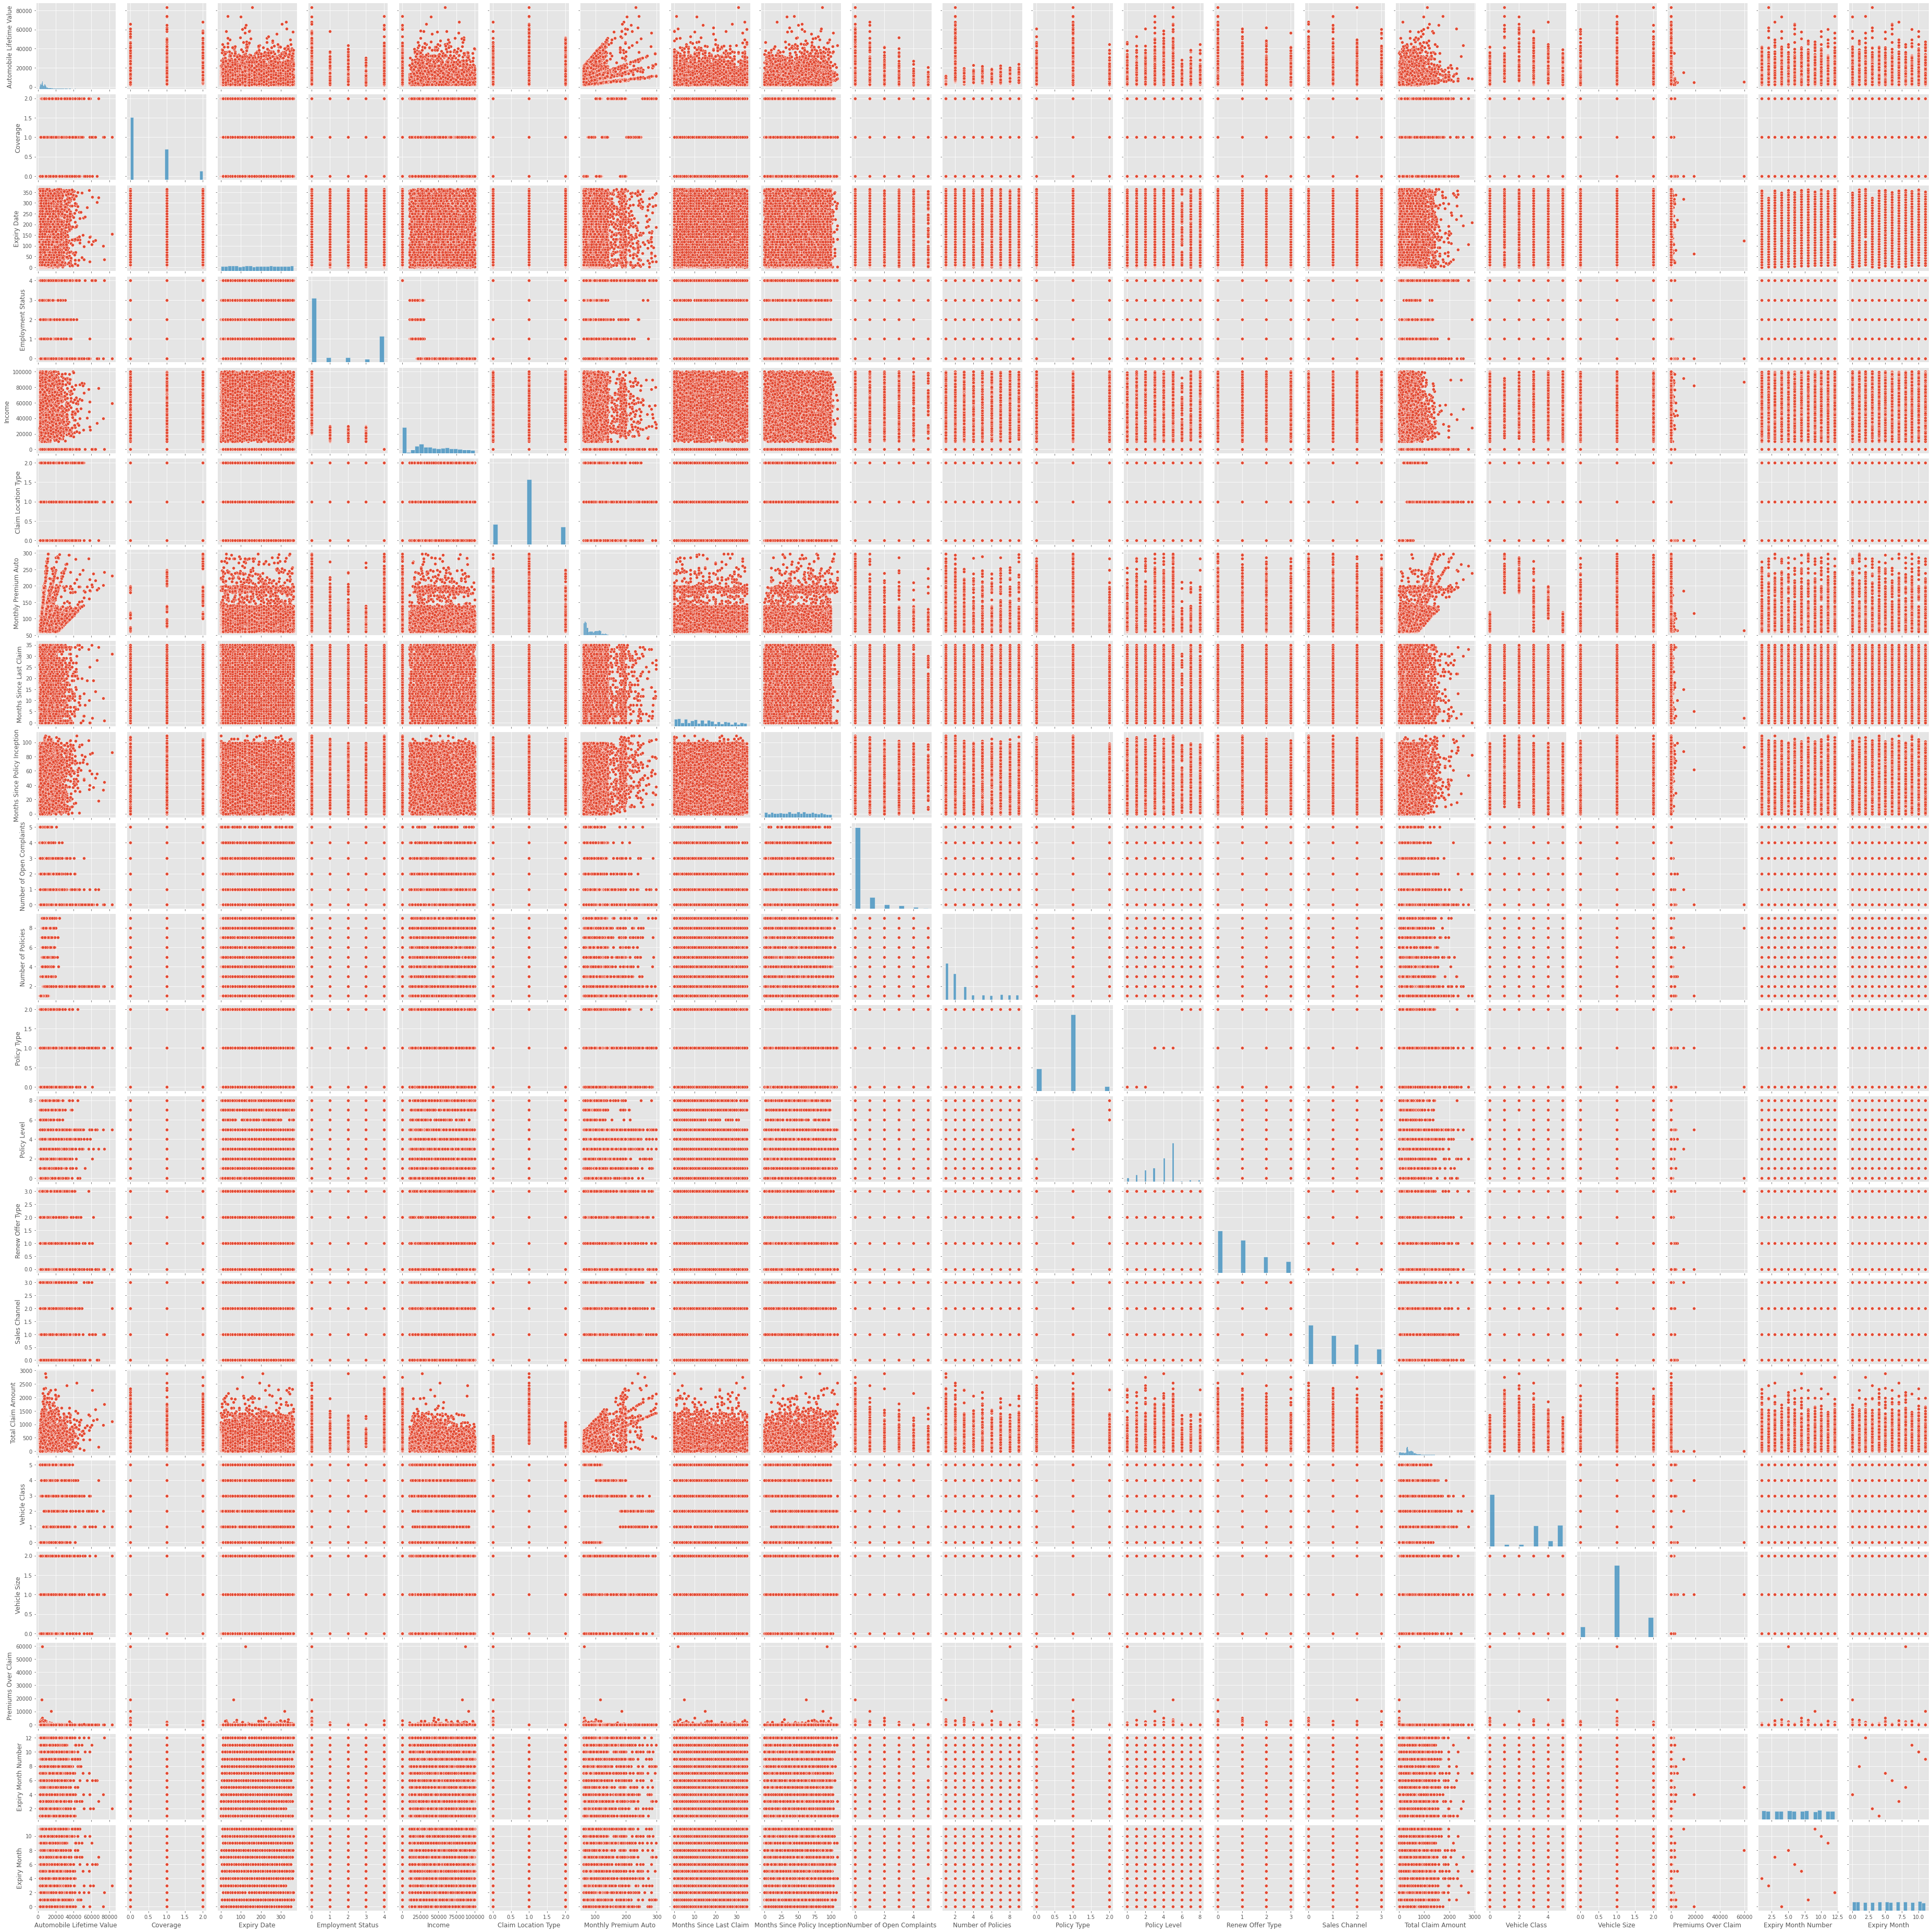

In [24]:
sns.pairplot(df, diag_kind = 'hist')